In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import streamlit as st
import matplotlib.pyplot as plt
import altair as alt


In [4]:
import pandas as pd
data = pd.read_csv('/Users/ay/Desktop/Project2/data/3-1-1-service-requests.csv', delimiter=';')

service_requests = data[['Department', 'Service request type', 'Status', 'Closure reason', 'Service request open timestamp','Service request close date','Local area','Channel']]
service_requests.head()
# data.head()
# service_requests.to_csv('/Users/ay/Desktop/Project2/data/311service-requests.csv', index=False)


,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel
0,ENG - Parking Management,Residential Parking Permit Request Case,Close,Unknown,2022-09-16T20:21:59-07:00,2023-10-19,Sunset,Phone
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16T20:31:00-07:00,2022-09-21,Mount Pleasant,Phone
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16T20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone
3,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2022-09-16T20:37:36-07:00,2022-09-16,NaN,Phone
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16T20:58:00-07:00,2022-09-20,NaN,WEB


In [5]:
service_requests['Closure reason'].unique()
service_requests['Closure reason'].value_counts()
# service_requests.info()
service_requests['Service request type'].value_counts() # 1.1.1
service_requests['Service request type'].unique()

array(['Residential Parking Permit Request Case',
       'City and Park Trees Maintenance Case', 'Dead Animal Pick Up Case',
       'Parking Enforcement Transfer Case',
       'Building and Development Inquiry Case',
       'Urban Issues on City Property Case', 'Z - Curb Ramp Request Case',
       'Noise on Private Property Case', 'General Feedback Case',
       'Abandoned Non-Recyclables-Large Case', 'Dog Licence Case',
       'Business Licence Request Case', 'Urban Issues in Parks Case',
       'Street Furniture Request Case', 'Traffic Management Inquiry Case',
       'Private Property Construction Noise Case',
       'Street Cleaning and Debris Pick Up Case',
       'Street and Sidewalk Use Request Case',
       'Special Events Office Request Case',
       'City Services Feedback Case', 'Mayor and Council Feedback Case',
       'Van311 Feedback Case',
       'Security Alarm Permit (Revenue Services) Case',
       'Empty Homes Enforcement Tip Case', 'Abandoned Recyclables Case',
    

In [6]:
service_requests['Closure reason'].unique()
service_requests['Closure reason'].value_counts()
# service_requests.info()
request_types = []





In [7]:
service_requests['Service request type'].unique()


array(['Residential Parking Permit Request Case',
       'City and Park Trees Maintenance Case', 'Dead Animal Pick Up Case',
       'Parking Enforcement Transfer Case',
       'Building and Development Inquiry Case',
       'Urban Issues on City Property Case', 'Z - Curb Ramp Request Case',
       'Noise on Private Property Case', 'General Feedback Case',
       'Abandoned Non-Recyclables-Large Case', 'Dog Licence Case',
       'Business Licence Request Case', 'Urban Issues in Parks Case',
       'Street Furniture Request Case', 'Traffic Management Inquiry Case',
       'Private Property Construction Noise Case',
       'Street Cleaning and Debris Pick Up Case',
       'Street and Sidewalk Use Request Case',
       'Special Events Office Request Case',
       'City Services Feedback Case', 'Mayor and Council Feedback Case',
       'Van311 Feedback Case',
       'Security Alarm Permit (Revenue Services) Case',
       'Empty Homes Enforcement Tip Case', 'Abandoned Recyclables Case',
    

In [8]:
most_frequent_request = service_requests['Service request type'].value_counts().idxmax()
print("Most frequent service request type:", most_frequent_request)

Most frequent service request type: Building and Development Inquiry Case


In [9]:

# Identify and categorize request types
request_types = service_requests['Service request type'].unique()
# Example categorization (customize as needed)
categories = {
    'Garbage': ['Abandoned Recyclables Case', 'Garbage Pickup'],
    'Maintenance': ['Street Light Out', 'Pothole Repair'],
    # Add more categories as needed
}

# Determine most frequent request types
request_type_counts = service_requests['Service request type'].value_counts()
most_frequent_requests = request_type_counts.head(20)
most_frequent_requests

Service request type
Building and Development Inquiry Case     57784
Business Licence Request Case             34619
Missed Green Bin Pickup Case              30734
City and Park Trees Maintenance Case      25780
Garbage Bin Request Case                  24263
Mayor and Council Feedback Case           22020
Missed Garbage Bin Pickup Case            21392
Abandoned Non-Recyclables-Small Case      18360
Parking Enforcement Transfer Case         17910
Green Bin Request Case                    16693
City Services Feedback Case               15092
General Feedback Case                     12899
Noise on Private Property Case            10785
Abandoned or Uninsured Vehicle Case       10176
Meter Out of Order Internal Audit Case    10167
Animal Concern Case                        9487
Private Property Concern Case              9247
Abandoned Recyclables Case                 8914
Street Light Out Case                      8222
Pothole Case                               8158
Name: count, dtype:

In [10]:
category_mapping = {
    "Environmental and Waste Management": [
        "Dead Animal Pick Up Case",
        "Abandoned Non-Recyclables-Large Case",
        "Abandoned Non-Recyclables-Small Case",
        "Abandoned Mattress Case",
        "Garbage Bin Request Case",
        "Green Bin Request Case",
        "Missed Green Bin Pickup Case",
        "Missed Garbage Bin Pickup Case",
        "Illegal Dumping Case",
        "Recycling and Disposal Facility - Landfill Inquiry Case",
        "Recycling and Disposal Facility - Transfer Station Inquiry Case",
        "Street Cleaning and Debris Pick Up Case",
        "Needle Clean Up Case",
        "Loose Litter Clean Up Case",
        "Rats and Rodents Case",
        "Feeding Wildlife Case",
        "Street Surface Water Flooding Case",
        "Commercial Waste Container Concern Case",
        "Parks Operations and Maintenance Case",
        "Parking Management Inquiry Case",
        "Disposal Facility - Landfill Inquiry Case",
        "Disposal Facility - Transfer Station Inquiry Case",
        "Abandoned Recyclables Case",
        "Sanitation Operations Inquiry Case",
        "Snow and Ice Removal From City Property Case",
        "Graffiti Management Program Case",
        "Sewer Drainage and Design Inquiry Case",
        "Street and Sidewalk Use Request Case",
    ],
    "Public Property Maintenance": [
        "Street Repair Case",
        "Sidewalk Repair Case",
        "Street Light Out Case",
        "Graffiti Removal - City Property Case",
        "Graffiti Removal - Private Property Case",
        "Graffiti Removal - Park Property Case",
        "Graffiti Removal - Commercial Waste Container Case",
        "Pavement Markings Case",
        "Park Litter Can Case",
        "Street Furniture Maintenance Case",
        "Traffic Signal Repair Case",
        "Bridge and Structures Maintenance Case",
        "Vegetation Maintenance Case",
        "Boulevard Maintenance Case",
        "Meter Out of Order Internal Audit Case",
        "Street or Traffic Light Utility Damage Case",
        "Vegetation Encroachment of City Property Case",
        "Street Furniture Litter Can Maintenance Case",
        "Property Tax Request Case",
        "City Clock Maintenance Case",
        "ZZ OLD - Private Property Tree Removal Case",
        "Preventative Maintenance Program Case",
        "Sign Repair Case",
        "Pavement Marking Maintenance Case",
    ],
    "Parks and Recreation": [
        "Park Improvement Case",
        "Urban Issues in Parks Case",
        "Parks Feedback Case",
        "Park Board Commissioner Feedback Case",
        "Parks Washroom Servicing Case",
        "Park Facility Maintenance Request",
        "Canada Geese Nests Case",
        "Recreation Feedback Case",
        "Streets Horticulture Program Inquiry Case",
        "Park Ranger Request Case",
    ],
    "Transportation and Traffic": [
        "Residential Parking Permit Request Case",
        "Parking Enforcement Transfer Case",
        "Parking Enforcement Request Case",
        "Parking Meter Request Case",
        "Traffic Management Inquiry Case",
        "Traffic Calming Case",
        "Traffic Signal Timing Concern Case",
        "Traffic and Pedestrian Signal - Modify Request Case",
        "Traffic and Pedestrian Signal - New Request Case",
        "Street Construction Concern Case",
        "Curb Ramp Request Case",
        "Traffic Sign - New Request Case",
        "Traffic Sign - Modify Request Case",
        "Pothole Case",
        "Arterial St. Curbside Sign - Modify Request Case",
        "Arterial St. Curbside Sign - New Request Case",
        "School Traffic Concern Case",
        "Transportation Design Project Inquiry Case",
        "Community Transportation Request Case",
        "Tower Crane Site Survey Case",
        "ZZ OLD - Traffic Calming Case",
    ],
    "Residential and Private Property": [
        "Noise on Private Property Case",
        "Private Property Construction Concern Case",
        "Private Property Construction Noise Case",
        "Private Property Tree Removal Concern Case",
        "Residential Cart Concern Case",
        "Sidewalk Snow and Ice Removal Bylaw Violation Case",
        "Unpermitted Construction Container Concern Case",
        "Sewer Backup Case",
        "Sewer Odour Case",
        "High Water Consumption Concern Case",
        "Damage to Water System Case",
        "Water Leak Case",
        "Water Pressure Concern Case",
        "Residential Street Curbside Sign Request Case",
        "Private Property Concern Case",
        "Private Property Inquiry Case",
    ],
    "Permits and Licenses": [
        "Business Licence Request Case",
        "Dog Licence Case",
        "Security Alarm Permit (Revenue Services) Case",
        "Security Alarm Permit (VPD) Case",
        "Water Exemption Permit Request Case",
        "Short-Term Rental Concern Case",
        "Short-Term Rental Request Case",
        "Tour Bus Permit Case",
        "Fire Inspection Request Case",
    ],
    "Feedback and Inquiries": [
        "General Feedback Case",
        "City Services Feedback Case",
        "Van311 Feedback Case",
        "Mayor and Council Feedback Case",
        "Website Feedback Case",
        "Employee Feedback Case",
        "Public Hearing Feedback Case",
        "Park Board Commissioner Feedback Case",
        "Election Inquiry Case",
        "Recreation Feedback Case",
        "Accessibility Feedback Case",
        "City Manager Feedback Case",
    ],
    "Utilities and Infrastructure": [
        "Sewer Operations Inquiry Case",
        "Sewer Construction Concern Case",
        "Waterworks General Work Request Case",
        "Water Meter Reading Request Case",
        "Waterworks Operations Construction Concern Case",
        "Sewer Maintenance Hole Concern Case",
        "Catch Basin Concern Case",
        "Sewer Utility Damage Case",
        "Locate Water Service Line or Valve Case",
        "Water Service Line Turn On or Off Request Case",
        "Water Design Inquiry Case",
        "Water Hydrant Concern Case",
        "Waterworks Request Case",
        "Utility Billing Request Case",
    ],
    "Urban Planning and Development": [
        "Urban Planning Request Case",
        "Building and Development Inquiry Case",
        "Local Improvement Program Case",
        "Gastown Public Space Plan Request Case",
        "Planner Appointment Request Case",
        "Business Licence Change of Use (Five Uses) Case",
        "Character Merit Assessment Request Case",
        "Construction Related Concerns Case",
        "Vancouver Building Bylaw Inquiry Case",
    ],
    "Emergency and Safety": [
        "Fire Safety Hazards Case",
        "Fire Prevention Inquiry Case",
        "High Angle Rescue Inquiry Case",
        "Home Safety Check Request Case",
        "Emergency Referral Tracking Report Case",
        "Snow Angel Program Request Case",
        "Request Fire Reinspection (Inspector) Case",
        "Request Fire Reinspection (Firehall) Case",
        "Animal Concern Case",
        "Animal Services Inquiry Case",
    ],
    "Sustainability and Environmental Concerns": [
        "Sustainability Inquiry Case",
        "Water Conservation Violation Case",
        "Environmental Protection Inquiry Case",
        "Environmental Contamination Concern Case",
        "Single-Use Item Bylaw Request Case",
        "Adopt a Catch Basin Program Inquiry Case",
        "Free Paint Voucher Request Case",
    ],
    "Other Services": [
        "Filming Office Request Case",
        "Filming Inquiry Case",
        "Customer Service Service Request Case",
        "Newspaper Box Concern Case",
        "Address Change Request Case",
        "Transit Related Request Case",
        "Street Furniture Request Case",
        "Special Events Office Request Case",
        "Special Events Inquiry Case",
        "Hoarding Request Case",
        "Non-Vegetative Encroachment Case",
        "Hot Topic Case",
        "Lockbox Request Case",
        "Lost Pets Case",
        "Moving and Storage Container Concern Case",
        "New Crosswalk Marking Case",
        "New Litter Can Request Case",
        "New or Relocate Street Light Pole Case",
        "Parking Meter Refund Request Case",
        "Parking Ticket Review Case",
        "Fireworks Request Case",
        "Business Patio Inquiry Case",
        "Business Support Request Case",
        "Commercial Street Curbside Sign Request Case",
        "Neighbourhood Energy Utility Request Case",
        "Neighbourhood Energy Utility Issue Case",
        "Commercial Waste Container Concern Case",
        "Traffic Operations Construction Concern Case",
        "Sign Cleaning Case",
        "City Construction Project Concern Case",
        "General Street Issues Case",
    ],
}
def categorize_service_request(request_type):
    for category, requests in category_mapping.items():
        if request_type in requests:
            return category
    return "Other"
service_requests['Category'] = service_requests['Service request type'].apply(categorize_service_request)
service_requests.to_csv('data/311service-requests.csv', index=False)

/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_61661/340770513.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_requests['Category'] = service_requests['Service request type'].apply(categorize_service_request)


In [11]:
service_requests.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel,Category
0,ENG - Parking Management,Residential Parking Permit Request Case,Close,Unknown,2022-09-16T20:21:59-07:00,2023-10-19,Sunset,Phone,Transportation and Traffic
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16T20:31:00-07:00,2022-09-21,Mount Pleasant,Phone,Other
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16T20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone,Environmental and Waste Management
3,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2022-09-16T20:37:36-07:00,2022-09-16,NaN,Phone,Transportation and Traffic
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16T20:58:00-07:00,2022-09-20,NaN,WEB,Urban Planning and Development


In [14]:

import plotly.express as px

df = service_requests

# Count occurrences of service request types and categories
service_request_counts = (
    df.groupby(["Service request type", "Category"])
    .size()
    .reset_index(name="Count")
)

# Sort by count and select top 20
top_20 = service_request_counts.sort_values(by="Count", ascending=False).head(20)

# Plot with Plotly
fig = px.bar(
    top_20,
    x="Service request type",
    y="Count",
    color="Category",
    title="Top 20 Service Request Types by Category",
    labels={"Service request type": "Service Request Type", "Count": "Number of Requests"},
    text="Count",
)

# Customize layout
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title="Service Request Type",
    yaxis_title="Count",
    legend_title="Category",
    height=600,
    width=900
)

# Display in Streamlit
# st.plotly_chart(fig)

/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_61661/2897494017.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_61661/2897494017.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_61661/2897494017.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

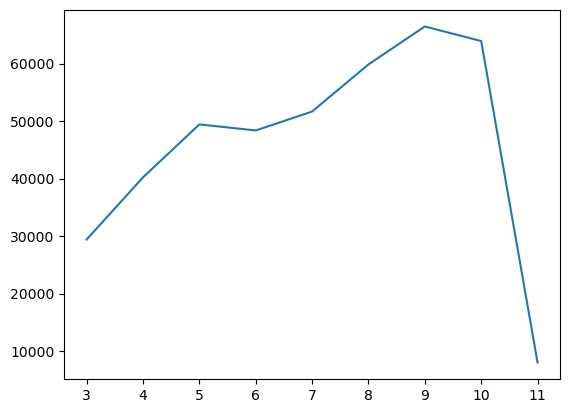

In [26]:
# Convert timestamps to datetime
service_requests['Service request open timestamp'] = pd.to_datetime(service_requests['Service request open timestamp'], errors='coerce')

# Analyze trends by month, weekday, and time of day
service_requests['month'] = service_requests['Service request open timestamp'].dt.month
service_requests['weekday'] = service_requests['Service request open timestamp'].dt.weekday
service_requests['hour'] = service_requests['Service request open timestamp'].dt.hour

monthly_trends = service_requests.groupby('month').size()
weekly_trends = service_requests.groupby('weekday').size()
hourly_trends = service_requests.groupby('hour').size()
plt.plot(monthly_trends.index, monthly_trends.values)
service_requests.to_csv('data/311service-requests.csv', index=False)

In [18]:
service_requests.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel,Category,month,weekday,hour
0,ENG - Parking Management,Residential Parking Permit Request Case,Close,Unknown,2022-09-16 20:21:59-07:00,2023-10-19,Sunset,Phone,Transportation and Traffic,9.0,4.0,20.0
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,Mount Pleasant,Phone,Other,9.0,4.0,20.0
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone,Environmental and Waste Management,9.0,4.0,20.0
3,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2022-09-16 20:37:36-07:00,2022-09-16,NaN,Phone,Transportation and Traffic,9.0,4.0,20.0
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,NaN,WEB,Urban Planning and Development,9.0,4.0,20.0


In [25]:
import altair as alt

# Monthly trends
monthly_trends = service_requests.groupby('month').size().reset_index(name='Count')

# Weekly trends
weekly_trends = service_requests.groupby('weekday').size().reset_index(name='Count')

# Hourly trends
hourly_trends = service_requests.groupby('hour').size().reset_index(name='Count')

# Altair charts
# Monthly trends chart
monthly_chart = alt.Chart(monthly_trends).mark_line(point=True).encode(
    x=alt.X('month:O', title='Month'),
    y=alt.Y('Count:Q', title='Number of Requests'),
    tooltip=['month', 'Count']
).properties(
    title="Monthly Service Request Trends",
    width=600,
    height=400
)

# Weekly trends chart
weekly_chart = alt.Chart(weekly_trends).mark_line(point=True).encode(
    x=alt.X('weekday:O', title='Weekday', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Count:Q', title='Number of Requests'),
    tooltip=['weekday', 'Count']
).properties(
    title="Weekly Service Request Trends",
    width=600,
    height=400
)

# Hourly trends chart
hourly_chart = alt.Chart(hourly_trends).mark_line(point=True).encode(
    x=alt.X('hour:O', title='Hour of Day'),
    y=alt.Y('Count:Q', title='Number of Requests'),
    tooltip=['hour', 'Count']
).properties(
    title="Hourly Service Request Trends",
    width=600,
    height=400
)

# # Display the charts in Streamlit
# st.altair_chart(monthly_chart, use_container_width=True)
# st.altair_chart(weekly_chart, use_container_width=True)
# st.altair_chart(hourly_chart, use_container_width=True)

In [36]:
# Prepare data for visualization
# Aggregate counts for month, weekday, and hour
monthly_trends = service_requests.groupby('month').size().reset_index(name='Count')
monthly_trends['Metric'] = 'Month'

weekly_trends = service_requests.groupby('weekday').size().reset_index(name='Count')
weekly_trends['Metric'] = 'Weekday'

hourly_trends = service_requests.groupby('hour').size().reset_index(name='Count')
hourly_trends['Metric'] = 'Hour'

# Combine data into a single DataFrame
monthly_trends.rename(columns={'month': 'Value'}, inplace=True)
weekly_trends.rename(columns={'weekday': 'Value'}, inplace=True)
hourly_trends.rename(columns={'hour': 'Value'}, inplace=True)
combined_data = pd.concat([monthly_trends, weekly_trends, hourly_trends], ignore_index=True)

# Define Altair dropdown selection
selection = alt.selection_single(
    fields=['Metric'], 
    bind=alt.binding_select(options=['Month', 'Weekday', 'Hour'], name="Select Metric: "),
    value='Month'  # Set the initial value using the value argument
)

# Create the chart
chart = alt.Chart(combined_data).mark_line(point=True).encode(
    x=alt.X('Value:O', title='Time Metric'),
    y=alt.Y('Count:Q', title='Number of Requests'),
    color=alt.Color('Metric:N', legend=None),
    tooltip=['Value', 'Count']
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    title="Service Request Trends by Time",
    width=800,
    height=400
)

# Display the chart in Streamlit
# st.altair_chart(chart, use_container_width=True)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



NameError: name 'st' is not defined

In [41]:
import altair as alt

# Group data by category and request type
monthly_data = (
    service_requests.groupby(['month', 'Category', 'Service request type'])
    .size()
    .reset_index(name='Count')
)

# Dropdown selection for category
category_dropdown = alt.binding_select(
    options=monthly_data['Category'].unique().tolist(),
    name="Select Category: "
)
category_selection = alt.selection_single(
    fields=['Category'],
    bind=category_dropdown
)

# Dropdown selection for request type (dependent on category)
request_type_dropdown = alt.binding_select(
    options=monthly_data['Service request type'].unique().tolist(),
    name="Select Request Type: "
)
request_type_selection = alt.selection_single(fields=['Service request type'], bind=request_type_dropdown)

# Main chart (drills down by category and request type)
chart = alt.Chart(monthly_data).mark_line(point=True).encode(
    x=alt.X('month:O', title='Month'),
    y=alt.Y('Count:Q', title='Number of Requests'),
    color='Service request type:N',
    tooltip=['Service request type', 'Count', 'month']
).add_selection(
    category_selection
).transform_filter(
    category_selection
).add_selection(
    request_type_selection
).transform_filter(
    request_type_selection
).properties(
    title="Trends by Category and Request Type",
    width=800,
    height=400
)

# Display in Streamlit
st.altair_chart(chart, use_container_width=True)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



NameError: name 'st' is not defined